# Weather Trends


### Import libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import dataset

In [34]:
df_city=pd.read_csv('city_data_delhi.csv')
df_global=pd.read_csv('global_data.csv')

In [90]:
df_global.head(10)


,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
5,1755,8.36
6,1756,8.85
7,1757,9.02
8,1758,6.74
9,1759,7.99


In [91]:
df_city.head()

,year,city,country,avg_temp
0,1796,Delhi,India,25.03
1,1797,Delhi,India,26.71
2,1798,Delhi,India,24.29
3,1799,Delhi,India,25.28
4,1800,Delhi,India,25.21


In [92]:
# Merge the datasets using inner join based on the column name 'year'.
df=df_city.merge(df_global, how='inner', on='year')

In [93]:
# Rename the columns to indicate the average city temperature and average global temperature.
df=df.rename(columns={'avg_temp_x':'avg_city_temp', 'avg_temp_y':'avg_global_temp'})

In [94]:
df.head()

,year,city,country,avg_city_temp,avg_global_temp
0,1796,Delhi,India,25.03,8.27
1,1797,Delhi,India,26.71,8.51
2,1798,Delhi,India,24.29,8.67
3,1799,Delhi,India,25.28,8.51
4,1800,Delhi,India,25.21,8.48


In [95]:
df.shape


(218, 5)

In [96]:
# Check for null values
df.isnull().values.any()

True

In [98]:
# Count the number of total null values present in the dataset
df.isnull().sum()

year                0
city                0
country             0
avg_city_temp      17
avg_global_temp     0
dtype: int64

In [99]:
# Drop all columns with null values
df=df.dropna()

In [101]:
df.shape
# This means that 17 rows have been omitted

(201, 5)

In [102]:
df.describe()

,year,avg_city_temp,avg_global_temp
count,201.000000,201.000000,201.000000
mean,1909.298507,25.166269,8.452886
std,62.997226,0.594003,0.521460
min,1796.000000,23.700000,6.940000
25%,1851.000000,24.800000,8.130000
50%,1913.000000,25.140000,8.500000
75%,1963.000000,25.550000,8.730000
max,2013.000000,26.710000,9.730000


### Calculate moving average

In [103]:
# Here, the window size is chosen as 8
df['city_moving_avg'] = df.iloc[:,3].rolling(window=8).mean().dropna()
df['global_moving_avg']= df.iloc[:,4].rolling(window=8).mean().dropna()

In [105]:
df.head(10)

,year,city,country,avg_city_temp,avg_global_temp,city_moving_avg,global_moving_avg
0,1796,Delhi,India,25.03,8.27,NaN,NaN
1,1797,Delhi,India,26.71,8.51,NaN,NaN
2,1798,Delhi,India,24.29,8.67,NaN,NaN
3,1799,Delhi,India,25.28,8.51,NaN,NaN
4,1800,Delhi,India,25.21,8.48,NaN,NaN
5,1801,Delhi,India,24.22,8.59,NaN,NaN
6,1802,Delhi,India,25.63,8.58,NaN,NaN
7,1803,Delhi,India,25.38,8.50,25.21875,8.51375
8,1804,Delhi,India,25.68,8.84,25.30000,8.58500
9,1805,Delhi,India,25.30,8.56,25.12375,8.59125


In [106]:
# Remove all the rows with NaN values to prepare dataset for plotting line chart
df=df[7:]

In [107]:
df.head()

,year,city,country,avg_city_temp,avg_global_temp,city_moving_avg,global_moving_avg
7,1803,Delhi,India,25.38,8.50,25.21875,8.51375
8,1804,Delhi,India,25.68,8.84,25.30000,8.58500
9,1805,Delhi,India,25.30,8.56,25.12375,8.59125
10,1806,Delhi,India,25.22,8.43,25.24000,8.56125
11,1807,Delhi,India,24.97,8.28,25.20125,8.53250


### Line Chart

Text(0.5, 1.0, 'Weather Trend')

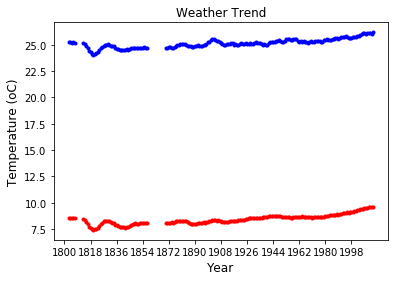

In [108]:
# The blue color indicated the moving average of the temparature of the particualr city which is chosen as 'Delhi'
# The red color indicates the moving average of the global temperature
plt.plot(df['year'],df['city_moving_avg'],'bo', df['year'],df['global_moving_avg'],'ro', linewidth=1, markersize=3)
plt.xlabel('Year', fontsize=12)
# xticks is used to inclrease the number of divisions for the x-axis
plt.xticks(np.arange(1800,2015,18))
plt.ylabel('Temperature (oC)', fontsize=12)
plt.title('Weather Trend')